# Spotify Plots

## Import libraries and packages

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




## Read the csv

In [26]:

spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()


,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


## Group by Genre and calculate the average total streams

In [27]:

avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

# Bar Chart

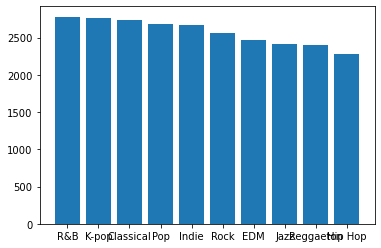

In [28]:
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

### Plot bar with labels

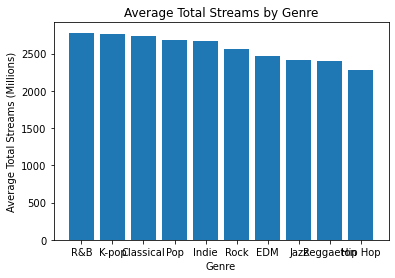

In [29]:
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.show()

### Plot bar with size and shape

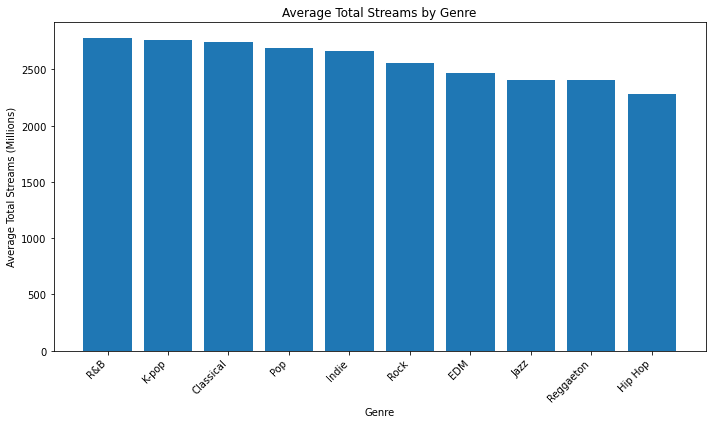

In [30]:
plt.figure(figsize=(10,6))

plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45,ha="right")

plt.tight_layout()

plt.show()

### Plot bar with ax.spines and remove lines

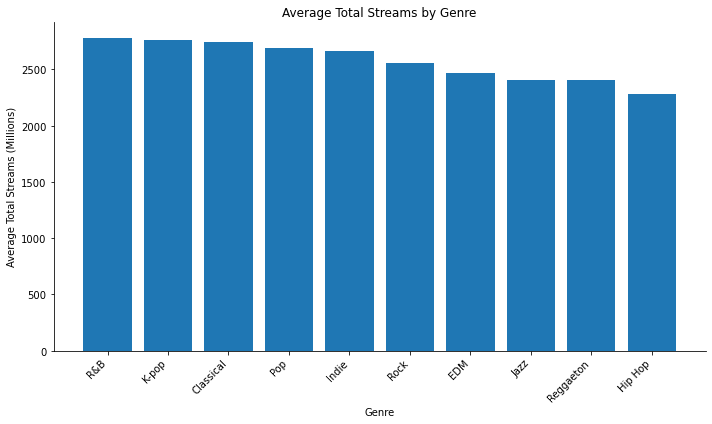

In [31]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45,ha="right")

plt.tight_layout()

plt.show()

In [32]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams

Artist
Dua Lipa          3008.270000
Ariana Grande     2869.031111
BTS               2824.987955
BLACKPINK         2763.213243
Bad Bunny         2655.404000
Billie Eilish     2650.803548
Doja Cat          2649.965588
Drake             2611.255161
The Weeknd        2523.978000
Ed Sheeran        2510.267143
Olivia Rodrigo    2481.721765
Post Malone       2415.280323
Karol G           2344.262432
Taylor Swift      2270.203333
SZA               1919.527000
Name: Total Streams (Millions), dtype: float64

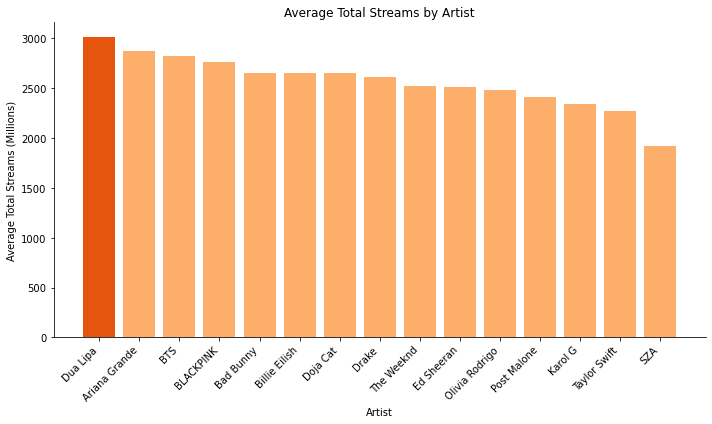

In [33]:
plt.figure(figsize=(10,6))
colors = ["#fdae6b"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#e6550d"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45,ha="right")

plt.tight_layout()

plt.show()

## Plot bar and make other bars transparent

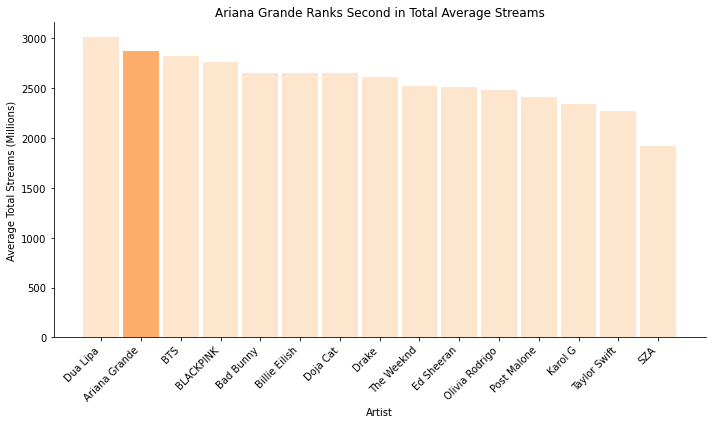

In [34]:

plt.figure(figsize=(10,6))

special_artist = "Ariana Grande"
colors = ['#fdae6b' if artist == special_artist else '#fee6ce' for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Ariana Grande Ranks Second in Total Average Streams")
plt.xticks(rotation=45,ha="right")

plt.tight_layout()

plt.savefig("../plots/Ariana_Grande_Streams.svg")
plt.show()

# Scatter Plots

In [35]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

### Basic Scatter Plot

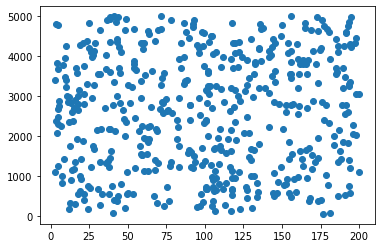

In [36]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])

plt.show()

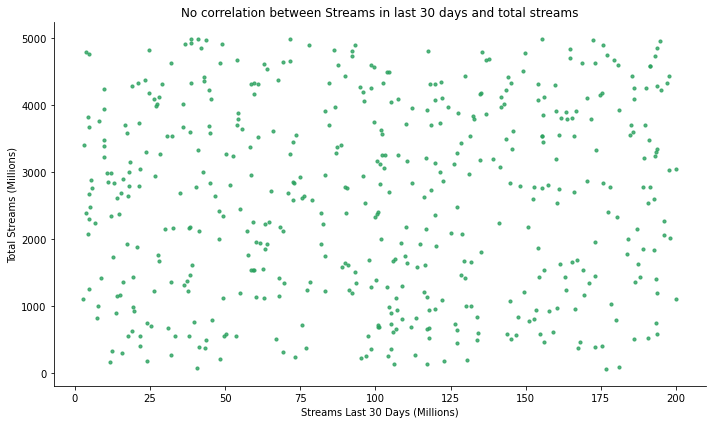

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(spotify_df["Streams Last 30 Days (Millions)"],
            spotify_df["Total Streams (Millions)"],
            color="#2ca25f",
            alpha=0.8,
            s= 10)

plt.xlabel("Streams Last 30 Days (Millions)")
plt.ylabel("Total Streams (Millions)")
plt.title("No correlation between Streams in last 30 days and total streams")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.tight_layout()
plt.show()

### Highlight certain dots

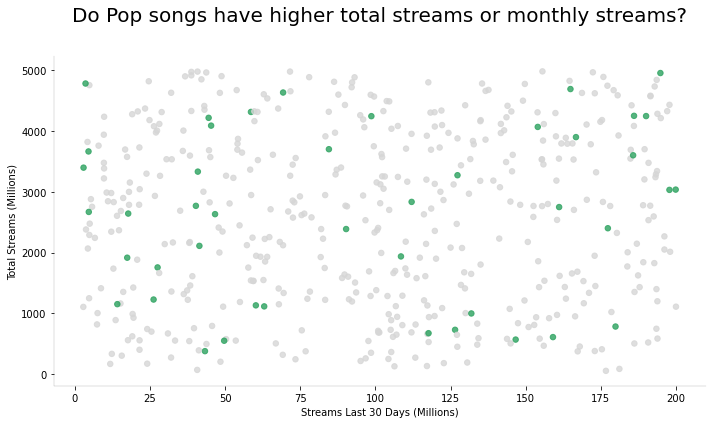

In [47]:


plt.figure(figsize=(10,6))

featured_genre = "Pop"

colors = ["#2ca25f" if genre == featured_genre else "#d6d6d6" for genre in spotify_df["Genre"]]

plt.scatter(spotify_df["Streams Last 30 Days (Millions)"],
            spotify_df["Total Streams (Millions)"],
            color= colors,
            alpha=0.8,
            s= 30)

plt.xlabel("Streams Last 30 Days (Millions)")
plt.ylabel("Total Streams (Millions)")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Do Pop songs have higher total streams or monthly streams?", fontsize = 20, pad=35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)
    
plt.tight_layout()
plt.savefig("../plots/Total_Streams_Pop_Song.svg")
plt.show()

# Line Charts

In [39]:
yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg


Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

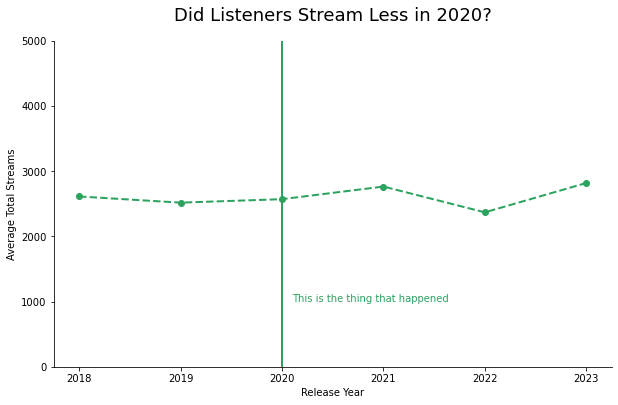

In [48]:
plt.figure(figsize=(10,6))

plt.plot(yearly_avg.index,
         yearly_avg.values,
         marker = "o",
         linestyle = "--",
         color = "#2ca25f",
         linewidth = 2)

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2020?", fontsize=18, pad=20)

ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.axvline(
    2020,
    color = "#2ca25f",
    linewidth = "2",
    )

ax.text(
    2020+.1,
    1000,
    "This is the thing that happened",
    color = "#2ca25f",
    fontsize = 10
)

plt.ylim(0,5000)

plt.savefig("../plots/AvgStreams_ReleaseYear.svg")
plt.show()

# Pie Charts

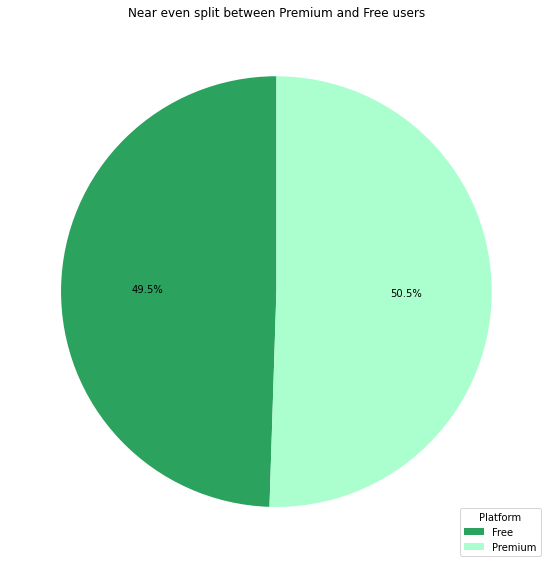

In [41]:
category = "Platform Type"
values = "Total Streams (Millions)"

platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals

plt.figure(figsize = (8,8))

plt.pie(
    platform_totals,
    labels=None,
    startangle=90,
    colors=["#2ca25f", "#abffcf"],
    autopct = "%1.1f%%")

plt.title("Near even split between Premium and Free users")

plt.legend(
    labels = platform_totals.index,
    loc= "lower right",
    title = "Platform"
)

plt.tight_layout()
plt.show()



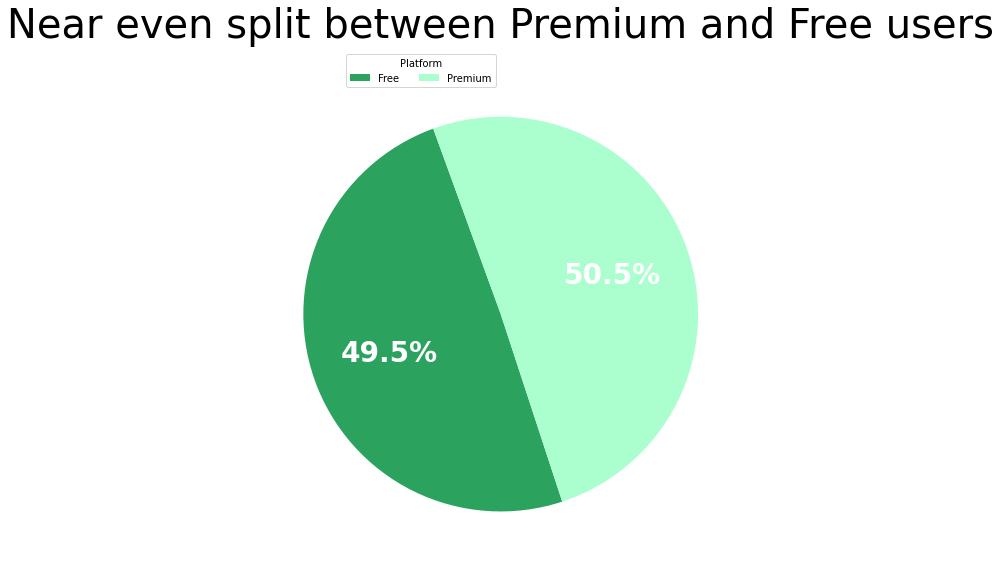

In [42]:
fig, ax = plt.subplots(figsize=(8,8))

wedges, tests, autotexts = ax.pie(
    platform_totals,
    autopct = "%1.1f%%",
    startangle=110,
    colors=["#2ca25f", "#abffcf"],
    )

ax.set_title(
    "Near even split between Premium and Free users",
    fontsize = 40,
    pad=30,
    loc="center"
)

for autotext in autotexts:
    autotext.set_fontsize(28)
    autotext.set_color("white")
    autotext.set_weight("bold")

ax.legend(
    labels = platform_totals.index,
    loc= "lower right",
    title = "Platform",
    bbox_to_anchor = [0.5, 0.95],
    ncol = 2
)

plt.tight_layout()
plt.show()

# Histograms

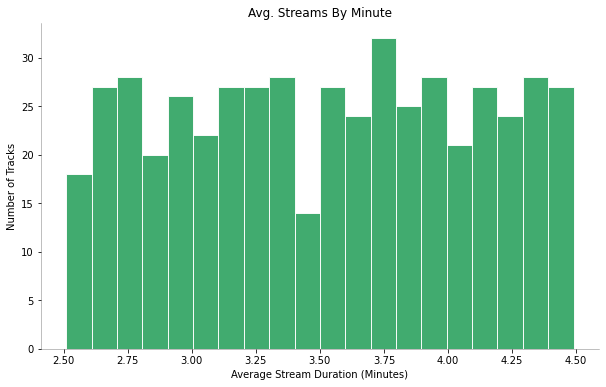

In [43]:
plt.figure(figsize=(10,6))

plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
    bins=20,
    color= "#2ca25f",
    alpha=0.9,
    edgecolor="white"
)


plt.xlabel("Average Stream Duration (Minutes)")
plt.ylabel("Number of Tracks")
plt.title("Avg. Streams By Minute")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



plt.show()


# Boxplots

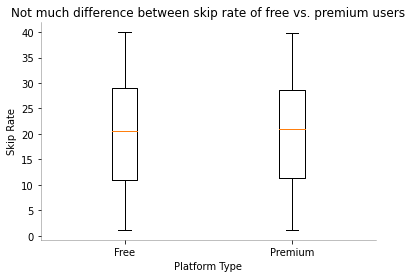

In [44]:


plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
    spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1,2],["Free", "Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate")
plt.title("Not much difference between skip rate of free vs. premium users")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# Heatmaps

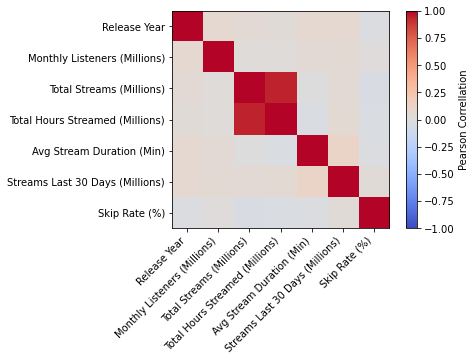

In [45]:

numeric_spotify_df = spotify_df.select_dtypes(include=[np.number])
corr = numeric_spotify_df.corr()

im = plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar(im, label="Pearson Correllation")

plt.xticks(range(len(corr.columns)),corr.columns, rotation=45,ha="right")
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()

# Count Plots

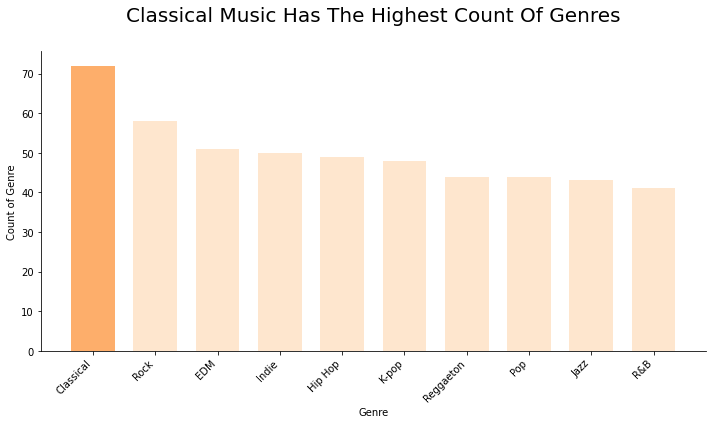

In [46]:
genre_counts = spotify_df["Genre"].value_counts().sort_values(ascending=False)
genre_counts

plt.figure(figsize=(10,6))

colors = ['#fdae6b' if genre == "Classical" else '#fee6ce' for genre in genre_counts.index]
plt.bar(genre_counts.index, genre_counts.values, color=colors, width = .7)
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(
    "Classical Music Has The Highest Count Of Genres",
    fontsize = 20,
    pad=30,
    loc="center"
)

plt.xlabel("Genre")
plt.ylabel("Count of Genre")

plt.tight_layout()
plt.show()
